In [102]:
%matplotlib inline
import numpy as np
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(precision=7)
import matplotlib.pyplot as plt
import math 
import pandas as pd
from numpy import linalg as LA
from sympy import * 

In [103]:
# Scale function
def scale(vec_1):
    
    # Test
    v1_scale = np.square(np.linalg.norm(vec_1))
#     print(v1_scale)

    v1 = np.multiply(1/np.sqrt(v1_scale + 1e-15),vec_1)
#     print(v1)
    
    return list(v1)
    
    
def QR(span):
    
    # Setup arrays
    # Original Values
    vector = []
    # Normalized Values
    vec_norm = []

    # Size of array
    row,col = span.shape
    
    # First Column
    v1 = span[:,0]
    vec_1 = v1
    vector.append(vec_1)

    v1 = scale(vec_1)
    vec_norm.append(v1)
    
    # Subsequent Columns

    start = 1
    end = col

    for j in range(start,end):

        # Column
        projection = span[:,j]
        v = span[:,j]

        #Orthonormal vector
        for i in range(len(vec_norm)):
            #projection
            # dot
            proj_dot = np.dot(v,vec_norm[i])/(np.dot(vec_norm[i],vec_norm[i]) + 1e-15)
            proj = np.multiply(proj_dot,vec_norm[i])
            projection = projection - proj

        v_norm = scale(projection)

        vec_norm.append(v_norm)
        
    # Calculate R
    Q = vec_norm
    Q = np.array(Q)
    R = np.dot(Q,span)
    R = np.array(R)

    
    return Q.T,R

def eigenspace(span):
    
    eig_vec = np.eye(span.shape[0])
    X = span.copy()

    for _ in range(100):
        Q,R = QR(X)
        eig_vec = np.dot(eig_vec,Q)
        X = np.dot(R,Q)
        eig_val = np.diag(X)
        
    return eig_val,eig_vec, X


def CoV(df):
    
    # Shape of dataframe
    row,col = df.shape
    print(row,col)
    
    # Determine indices
#     if row > col:
#         row = col
#         col = row
    
    # Initialize Covariance matrix
    CoVar = np.zeros((col,col))
    
    # List of means
    stats = []
    for i in range(col):
        stats.append(df.iloc[:,i].mean())

    # Solve covariance matrix        
    for k in range(col):
        for i in range(col):
            var = 0
            for j in range(row):
                var = var + ((df.iloc[j,k] - stats[k])*(df.iloc[j,i] - stats[i]))/(row-1)
            CoVar[k][i] = var
        
    return CoVar
    
    

In [104]:
# Create panda matrix
x = [2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]
y = [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]



# angle = np.radians(30.)
# x = np.random.normal(scale=8, size=100)
# y = np.random.normal(scale=8, size=100)
# x = np.random.randint(0,10,1000)
# y = np.random.randint(0,10,1000)

# Create dataframe.
df = pd.DataFrame([x,y])
df = df.transpose()
df_copy = df.copy()
orginaldataset = df.copy()
df.columns = ['x','y']
print(df)
row,col = df.shape
print(df.mean())
print(df.std())

     x    y
0  2.5  2.4
1  0.5  0.7
2  2.2  2.9
3  1.9  2.2
4  3.1  3.0
5  2.3  2.7
6  2.0  1.6
7  1.0  1.1
8  1.5  1.6
9  1.1  0.9
x    1.81
y    1.91
dtype: float64
x    0.785211
y    0.846496
dtype: float64


In [105]:
# Adjust Data
x_adjust = []
y_adjust = []
for i in range(len(x)):
    x_adjust.append(df['x'][i] - df['x'].mean())
    y_adjust.append(df['y'][i] - df['y'].mean())
    
# x_adjust.append((df['x'][i] - df['x'].mean())/df['x'].std())
# y_adjust.append((df['y'][i] - df['y'].mean())/df['y'].std())

row_data_adjust = pd.DataFrame([x_adjust,y_adjust])
row_data_adjust = row_data_adjust.transpose()
row_data_adjust.columns = ['x','y']

# print(row_data_adjust.transpose())
# print(row_data_adjust[1].mean())
# print(row_data_adjust.columns = ['x','y'])

In [106]:
CoVar = CoV(row_data_adjust)
print(CoVar)

10 2
[[0.6165556 0.6154444]
 [0.6154444 0.7165556]]


In [107]:
eig_val,eig_vec,X = eigenspace(CoVar)
print(eig_val)
print(eig_vec)

[1.2840277 0.0490834]
[[ 0.6778734 -0.7351787]
 [ 0.7351787  0.6778734]]


In [108]:
print(eig_val[0])
eigenvalue_3sigma = 3 * np.sqrt(eig_val[0]) 
eigenvalue_3sigma_arr = np.array([[-eigenvalue_3sigma, eigenvalue_3sigma]])
eigenvector = np.array([eig_vec[0]]).T *1
print(eigenvector)
print(eigenvalue_3sigma_arr)
# x_comp_1,y_comp_1 = np.multiply(np.dot(-eigenvector, -eigenvalue_3sigma_arr), -1)
# print(x_comp_1)
# print(y_comp_1)
x_comp_1 = eigenvector[0].dot(eigenvalue_3sigma_arr)
y_comp_1 = -eigenvector[1].dot(eigenvalue_3sigma_arr)
print(x_comp_1)
print(y_comp_1)

1.2840277121726855
[[ 0.6778734]
 [-0.7351787]]
[[-3.3994484  3.3994484]]
[-2.3043956  2.3043956]
[-2.4992019  2.4992019]


In [109]:
print(eig_val[1])
eigenvalue_3sigma = 3 * np.sqrt(eig_val[1]) 
eigenvalue_3sigma_arr = np.array([[-eigenvalue_3sigma, eigenvalue_3sigma]])
eigenvector = np.array([eig_vec[1]]).T * 1
# x_comp_2,y_comp_2 = np.multiply(np.dot(-eigenvector, -eigenvalue_3sigma_arr), -1)
x_comp_2 = eigenvector[0].dot(eigenvalue_3sigma_arr)
y_comp_2 = -eigenvector[1].dot(eigenvalue_3sigma_arr)
# print(x_comp_1)
# print(y_comp_1)
print(x_comp_2)
print(y_comp_2)

0.04908339893630035
[-0.4886315  0.4886315]
[ 0.4505439 -0.4505439]


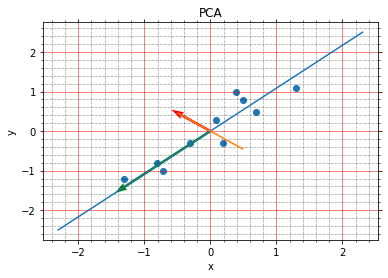

In [110]:
plt.scatter(row_data_adjust['x'],row_data_adjust['y'])
plt.plot(x_comp_1,y_comp_1)
plt.plot(x_comp_2,y_comp_2)
plt.quiver(x_comp_2[0],y_comp_2[0], scale = 5, angles='xy', color='red')
plt.quiver(x_comp_1[0],y_comp_1[0], scale = 10, angles='xy', color='Green')

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('y')
# giving a title  
plt.title('PCA') 
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Turn off the display of all ticks.
plt.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

plt.show()

In [111]:
# x_comp_2[1].dot(y_comp_2[1])
np.dot(x_comp_1,y_comp_1)

11.518299928763044

In [112]:
# Row Feature Vector
row_feature_vector = eig_vec.T
print(row_feature_vector)

[[ 0.6778734  0.7351787]
 [-0.7351787  0.6778734]]


In [113]:
# Final Data
FinalData = row_feature_vector.dot(row_data_adjust.T)
FinalData_1 = row_feature_vector[0].dot(row_data_adjust.T)
# print(FinalData.T)
# print(FinalData_1)
# plt.plot(FinalData_1)

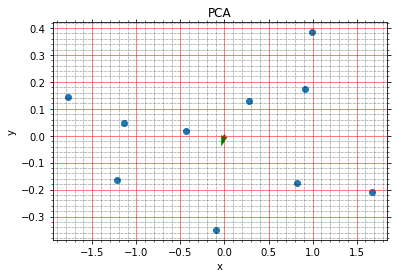

In [114]:
# plt.scatter(FinalData_1,FinalData_1)
plt.scatter(FinalData[0],FinalData[1])
# plt.plot(x_comp_1,y_comp_1)
# plt.plot(x_comp_2,y_comp_2, color='magenta')
plt.quiver(x_comp_2[0],y_comp_2[0], scale = 100, angles='xy', color='red')
plt.quiver(x_comp_1[0],y_comp_1[0], scale = 100, angles='xy', color='Green')

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('y')
# giving a title  
plt.title('PCA') 
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Turn off the display of all ticks.
plt.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

plt.show()

In [115]:
np.dot(x_comp_1,y_comp_1)

11.518299928763044

In [116]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(FinalData.T)
# print(principalComponents)

In [117]:
principalComponents = principalComponents.T

In [118]:
# principalComponents[0]

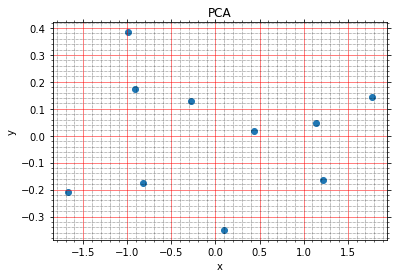

In [119]:
# plt.scatter(FinalData_1,FinalData_1)
plt.scatter(principalComponents[0],principalComponents[1])
# plt.plot(x_comp_1,y_comp_1)
# plt.plot(x_comp_2,y_comp_2, color='magenta')
# plt.quiver(x_comp_2[1],y_comp_2[1], scale = 100, angles='xy', color='red')
# plt.quiver(x_comp_1[1],y_comp_1[1], scale = 100, angles='xy', color='Green')

# axis = pca.components_.T
# axis /= axis.std()
# x_axis, y_axis = axis
# plt.quiver(0, 0, x_axis, y_axis, zorder=11, width=0.01, scale=6, color='red')

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('y')
# giving a title  
plt.title('PCA') 
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

# Turn off the display of all ticks.
plt.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks

plt.show()

[[-1.  0.]
 [-0.  1.]]


<ipython-input-120-0f7d45ce86cb>:11: RuntimeWarning: covariance is not positive-semidefinite.
  x1,x2 = np.random.multivariate_normal(mean,cov,1000).T


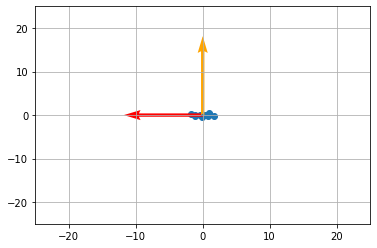

In [120]:
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt

#----------------------------------------------------------------------------------------#

mean = [0,0]
cov = [[40,25],[10,1]]

x1,x2 = np.random.multivariate_normal(mean,cov,1000).T

X = np.c_[x1,x2]

plt.xlim(-25.0,25.0)
plt.ylim(-25.0,25.0)
plt.grid()

plt.scatter(FinalData[0],FinalData[1])

#----------------------------------------------------------------------------------------#

pca = PCA(n_components=2)

pca.fit(FinalData.T)

#print(pca.explained_variance_ratio_) 
#print(pca.components_)

axis = pca.components_.T
print(axis)
axis /= axis.std()
x_axis, y_axis = axis

plt.plot(0.1 * x_axis, 0.1 * y_axis, linewidth=1 )
plt.quiver(0,0,x_axis[0], y_axis[0], width=0.01, scale=6, color='red')
plt.quiver(0,0,x_axis[1], y_axis[1], width=0.01, scale=6, color='orange')

# plt.savefig('pca_example_1.png')
plt.show()

In [121]:
pca = PCA(n_components=2)
pca.fit(FinalData.T)

PCA(n_components=2)